## Week-1 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly

Also report :
- Asset with highest expected return:
- Asset with highest volatility:
- If there is any negatively correlated pairs (corr < -0.1) and if yes also mention which are they

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment1_yourrollno.ipnyb`


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [ ]:
TICKERS = ['DMART.NS', 'TRENT.NS','EMAMILTD.NS']  # you can change these take any 3 assets that are in yfinance
print("Selected assets:", TICKERS)


Selected assets: ['DMART.NS', 'TRENT.NS', 'EMAMILTD.NS']


In [ ]:
prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
prices = prices.xs('Close', axis=1, level=0)
# TO DO :Clean missing values using dropna and fillna
prices = prices.fillna(method='ffill').dropna()
prices.tail(10)

/tmp/ipython-input-3027125349.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-3027125349.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill').dropna()


Ticker,DMART.NS,EMAMILTD.NS,TRENT.NS
Date,,,
2025-12-02,3961.800049,522.000000,4226.500000
2025-12-03,3909.699951,520.799988,4188.200195
2025-12-04,3913.300049,516.549988,4215.799805
2025-12-05,3952.100098,525.299988,4183.100098
2025-12-08,3867.600098,522.450012,4090.500000
2025-12-09,3910.000000,519.750000,4085.399902
2025-12-10,3816.300049,525.950012,4018.300049
2025-12-11,3830.800049,530.900024,4047.500000
2025-12-12,3843.000000,539.549988,4075.399902


In [ ]:
# TO DO : Simple Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
prices=prices.drop(prices.index[0])
previous_prices = prices.shift(1)
simple_returns = ((prices - previous_prices) / previous_prices).dropna()

# TO DO : Log Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
log_returns = np.log(prices / prices.shift(1)).dropna()

print("\nSimple Returns :")
display(simple_returns.head(10))

print("\nLog Returns :")
display(log_returns.head(10))


Simple Returns :


Ticker,DMART.NS,EMAMILTD.NS,TRENT.NS
Date,,,
2022-12-19,0.025113,-0.011845,0.007639
2022-12-20,-0.000159,-0.005237,-0.003984
2022-12-21,-0.023560,0.002223,-0.032569
2022-12-22,-0.017943,-0.002451,-0.024846
2022-12-23,-0.011717,-0.031243,-0.036061
2022-12-26,0.041542,0.018843,0.056914
2022-12-27,0.009414,-0.006995,-0.007845
2022-12-28,-0.013952,-0.006447,-0.000334
2022-12-29,0.039960,0.007210,0.001634



Log Returns :


Ticker,DMART.NS,EMAMILTD.NS,TRENT.NS
Date,,,
2022-12-19,0.024803,-0.011915,0.007610
2022-12-20,-0.000159,-0.005251,-0.003992
2022-12-21,-0.023842,0.002220,-0.033111
2022-12-22,-0.018106,-0.002454,-0.025160
2022-12-23,-0.011786,-0.031741,-0.036728
2022-12-26,0.040702,0.018668,0.055353
2022-12-27,0.009370,-0.007019,-0.007876
2022-12-28,-0.014051,-0.006468,-0.000334
2022-12-29,0.039182,0.007184,0.001633


In [ ]:
TRADING_DAYS = 252

# TO DO : Annual expected return (mean log return × 252)
expected_return =log_returns.mean()*252

# TO DO : Annualized volatility (std of returns × sqrt(252))
volatility =log_returns.std()*sqrt(252)

print("\n Annualized Expected Return")
display(expected_return)

print("\n Annualized Volatility (Risk)")
display(volatility)


 Annualized Expected Return


,0
Ticker,
DMART.NS,-0.014587
EMAMILTD.NS,0.096288
TRENT.NS,0.364325



 Annualized Volatility (Risk)


,0
Ticker,
DMART.NS,0.259475
EMAMILTD.NS,0.321746
TRENT.NS,0.346969


In [ ]:
# TO DO : Covariance (annualized)- first find daily covariance (using log return) and then find the annual covariance
cov_daily =log_returns.cov()
cov_annual = cov_daily*252

# TO DO : Correlation matrix
corr = log_returns.corr()

print("\n Covariance Matrix (Annualized) ")
display(cov_annual)

print("\n Correlation Matrix ")
display(corr)



 Covariance Matrix (Annualized) 


Ticker,DMART.NS,EMAMILTD.NS,TRENT.NS
Ticker,,,
DMART.NS,0.067328,0.019300,0.020564
EMAMILTD.NS,0.019300,0.103520,0.014811
TRENT.NS,0.020564,0.014811,0.120388



 Correlation Matrix 


Ticker,DMART.NS,EMAMILTD.NS,TRENT.NS
Ticker,,,
DMART.NS,1.000000,0.231178,0.228413
EMAMILTD.NS,0.231178,1.000000,0.132670
TRENT.NS,0.228413,0.132670,1.000000


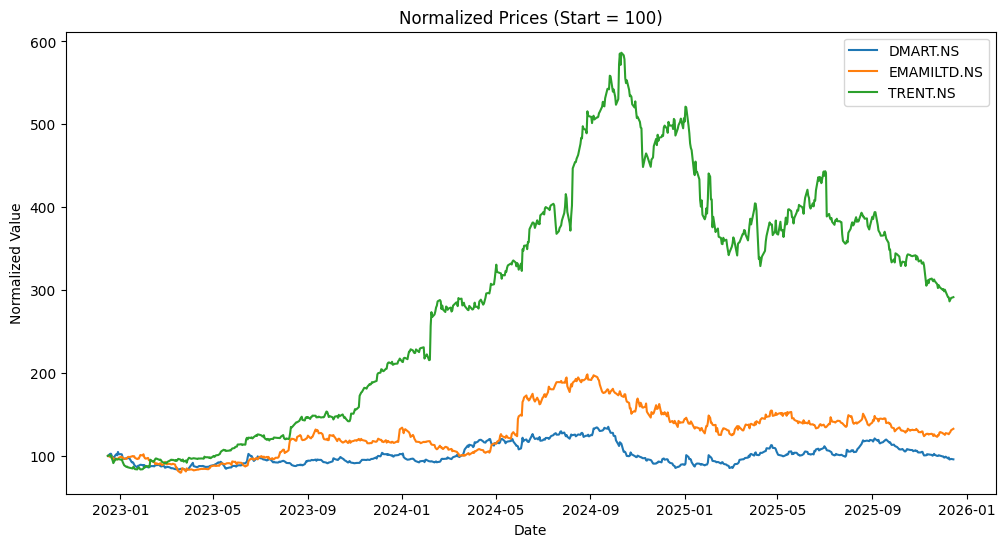

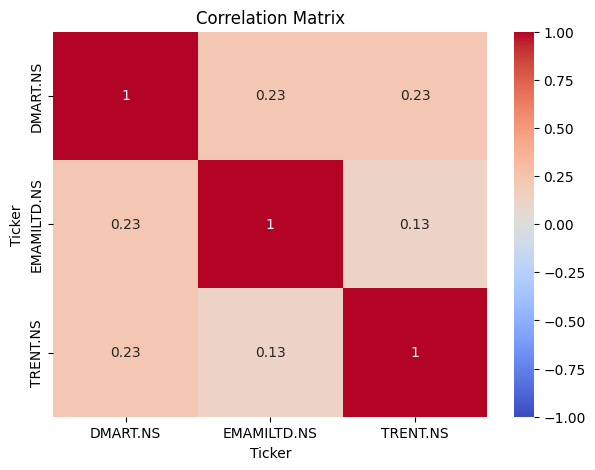

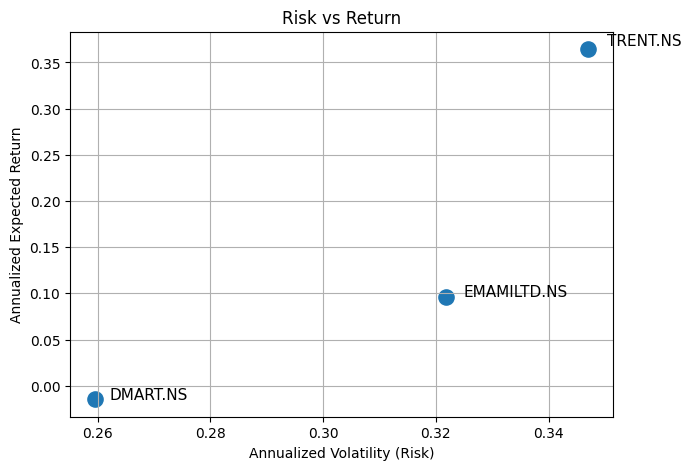

In [ ]:
#Visualization
norm_prices = prices / prices.iloc[0] * 100
plt.figure(figsize=(12,6))
for col in norm_prices.columns:
    plt.plot(norm_prices.index, norm_prices[col], label=col)

plt.title("Normalized Prices (Start = 100)")
plt.ylabel("Normalized Value")
plt.xlabel("Date")
plt.legend()
plt.show()

# 2) Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 3) Risk vs Return Scatter
plt.figure(figsize=(7,5))
plt.scatter(volatility, expected_return, s=120)

for t in TICKERS:
    plt.text(volatility[t]*1.01, expected_return[t]*1.01, t, fontsize=11)

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Expected Return")
plt.title("Risk vs Return")
plt.grid(True)
plt.show()

In [ ]:
print(f"Asset with highest annualized expected return is {expected_return.idxmax()} with value {expected_return.max()}")
print(f"Asset with highest annualized volatility is {volatility.idxmax()} with value {volatility.max()}")


Asset with highest annualized expected return is TRENT.NS with value 0.3641753523844141
Asset with highest annualized volatility is TRENT.NS with value 0.3469684616767562
